# Assessment 2: Machine Learning and Optimisation

## PART 1 – MACHINE LEARNING

### Task 1.1 – Data preparation 

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
glass_data = r'C:\Users\Jacks\Desktop\COMP2002_Assessment_2\datasets\glass_dataset.csv'

In [4]:
# Loading the dataset
data = pd.read_csv(glass_data)

In [5]:
# Display the initial data to verify it's loaded correctly
print("Initial data loaded:")
print(data.head())

Initial data loaded:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [6]:
# Check and print the missing values in each column
missing_data = data.isnull().sum()
print("Missing values in each column:")
print(missing_data)

Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [7]:
# Since there are no missing values as per the task requirements, proceed with normalization
scaler = StandardScaler()
features = data.columns[:-1]  # Assuming the last column is the target, adjust if otherwise
data[features] = scaler.fit_transform(data[features])

In [8]:
# Apply scaling to the features
data[features] = scaler.fit_transform(data[features])

In [9]:
# Display the normalized data to verify scaling
print("Normalized data:")
print(data.head())

Normalized data:
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  Type  
0 -0.352877 -0.586451     1  
1 -0.352877 -0.586451     1  
2 -0.352877 -0.586451     1  
3 -0.352877 -0.586451     1  
4 -0.352877 -0.586451     1  


### Task 1.2 – Classification

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [11]:
# Check for missing values and handle them if necessary
if data.isnull().sum().any():
    data.fillna(data.mean(), inplace=True)

In [12]:
# Define features and target
features = data.columns[:-1]  # Assuming the last column is the target
target = data.columns[-1]

In [13]:
# Scale the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

In [14]:
# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# k-Nearest Neighbors (kNN) Classifier Setup
knn_params = {'n_neighbors': [1, 3, 5, 7, 9]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_

In [16]:
# Support Vector Machine (SVM) Classifier Setup
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3]  # Restricting degree for polynomial kernel
}
svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_

In [17]:
# Evaluating the best kNN model
print("Best kNN Model Parameters:", knn_grid.best_params_)
knn_predictions = best_knn.predict(X_test)
print("k-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions, zero_division=0))

Best kNN Model Parameters: {'n_neighbors': 1}
k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.68      0.65      0.67        23
           3       0.50      0.50      0.50         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.90      0.95        10

    accuracy                           0.72        65
   macro avg       0.75      0.70      0.69        65
weighted avg       0.75      0.72      0.72        65



In [18]:
# Evaluating the best SVM model
print("Best SVM Model Parameters:", svm_grid.best_params_)
svm_predictions = best_svm.predict(X_test)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions, zero_division=0))

Best SVM Model Parameters: {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.84      0.74        19
           2       0.64      0.70      0.67        23
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         6
           6       0.50      0.67      0.57         3
           7       1.00      0.90      0.95        10

    accuracy                           0.71        65
   macro avg       0.63      0.60      0.60        65
weighted avg       0.69      0.71      0.69        65



In [19]:
# Demonstrate a prediction for a single input
sample_input = X_test.iloc[0:1]  # Select the first row from the test data
knn_sample_prediction = best_knn.predict(sample_input)
svm_sample_prediction = best_svm.predict(sample_input)
print("Sample Input Features:", sample_input.to_dict(orient='records'))
print("kNN Prediction for Sample Input:", knn_sample_prediction)
print("SVM Prediction for Sample Input:", svm_sample_prediction)

Sample Input Features: [{'RI': -0.2691370184124476, 'Na': -0.5006183708340572, 'Mg': 0.6361680303200007, 'Al': -0.17046023236518412, 'Si': 0.4387867303308444, 'K': 0.1121065145161126, 'Ca': -0.3922756855470959, 'Ba': -0.3528768282577753, 'Fe': 0.5451109200794807}]
kNN Prediction for Sample Input: [1]
SVM Prediction for Sample Input: [1]


### Task 1.3 – Assessment of classification

In [20]:
# Import libraries needed for cross-validation and plotting 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [21]:
# Perform cross-validation for each model
knn_scores = cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')
svm_scores = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')

In [22]:
# Print raw accuracy scores for each fold
print("kNN cross-validation accuracy scores:", knn_scores)
print("SVM cross-validation accuracy scores:", svm_scores)

kNN cross-validation accuracy scores: [0.60465116 0.74418605 0.62790698 0.55813953 0.57142857]
SVM cross-validation accuracy scores: [0.58139535 0.69767442 0.53488372 0.74418605 0.69047619]


In [23]:
# Calculate and print the mean and standard deviation
knn_mean, knn_std = np.mean(knn_scores), np.std(knn_scores)
svm_mean, svm_std = np.mean(svm_scores), np.std(svm_scores)

print(f"kNN Mean Accuracy: {knn_mean:.3f} ± {knn_std:.3f}")
print(f"SVM Mean Accuracy: {svm_mean:.3f} ± {svm_std:.3f}")

kNN Mean Accuracy: 0.621 ± 0.066
SVM Mean Accuracy: 0.650 ± 0.078


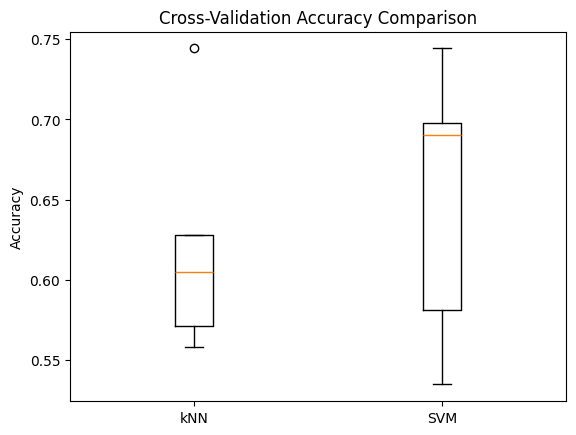

In [24]:
# Create a boxplot of cross-validation accuracy
plt.boxplot([knn_scores, svm_scores])
plt.title('Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')

# Manually set tick labels for each box
plt.xticks([1, 2], ['kNN', 'SVM'])

plt.show()

In [26]:
# Classification report on entire dataset or a separate test set
knn_preds_all = best_knn.predict(X)
svm_preds_all = best_svm.predict(X)
print("\nClassification Report for kNN on Entire Dataset:")
print(classification_report(y, knn_preds_all, zero_division=0))
print("Classification Report for SVM on Entire Dataset:")
print(classification_report(y, svm_preds_all, zero_division=0))


Classification Report for kNN on Entire Dataset:
              precision    recall  f1-score   support

           1       0.91      0.96      0.93        70
           2       0.91      0.89      0.90        76
           3       0.88      0.88      0.88        17
           5       1.00      0.69      0.82        13
           6       0.82      1.00      0.90         9
           7       1.00      0.97      0.98        29

    accuracy                           0.92       214
   macro avg       0.92      0.90      0.90       214
weighted avg       0.92      0.92      0.92       214

Classification Report for SVM on Entire Dataset:
              precision    recall  f1-score   support

           1       0.69      0.87      0.77        70
           2       0.74      0.76      0.75        76
           3       0.00      0.00      0.00        17
           5       1.00      0.77      0.87        13
           6       0.80      0.89      0.84         9
           7       1.00      0.93